Jorge Castro DAPT NOV 2021

## Lab | Feature engineering

### Checking for null values in the numerical columns:

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('learningSet.csv')

Let's get the Numerical and Categorical variables:

In [3]:
numerical = data.select_dtypes(include=[np.number])
categorical = data.select_dtypes(include=[object])

In [4]:
num_nulls_percent_df = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
num_nulls_percent_df.columns = ['column_name', 'nulls_percentage']

num_nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,0.248030
4,NUMCHLD,0.870184
...,...,...
402,TARGET_B,0.000000
403,TARGET_D,0.000000
404,HPHONE_D,0.000000
405,RFA_2F,0.000000


In [5]:
cat_nulls_percent_df = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
cat_nulls_percent_df.columns = ['column_name', 'nulls_percentage']

cat_nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,0.248030
4,NUMCHLD,0.870184
...,...,...
402,TARGET_B,0.000000
403,TARGET_D,0.000000
404,HPHONE_D,0.000000
405,RFA_2F,0.000000


### Use appropriate methods to clean the columns WEALTH1, ADI, DMA and MSA:

Filtering out the columns on the NaN DataFrame to get the % per variable:

In [6]:
num_nulls_percent_df[num_nulls_percent_df['column_name'].str.contains('GEOCODE')]

,column_name,nulls_percentage


In [7]:
cat_nulls_percent_df[cat_nulls_percent_df['column_name'].isin(['WEALTH1', 'ADI', 'DMA', 'MSA'])]

,column_name,nulls_percentage
6,WEALTH1,0.468830
150,MSA,0.001383
151,ADI,0.001383
152,DMA,0.001383


We can see that WEALTH1 has a high %
of NaN. Let's have a look more deeply into this column:

In [8]:
#Let's check the value counts, including NaNs
numerical['WEALTH1'].value_counts(dropna = False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

Making a plot to check the distribution:

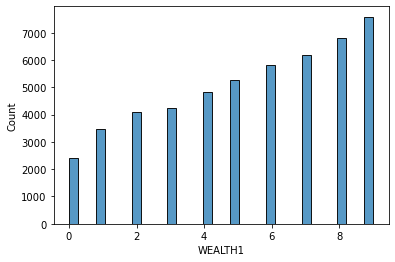

In [9]:
sns.histplot(numerical[numerical['WEALTH1'].notna()]['WEALTH1'])
plt.show()

This column looks more like a Categorical column, so for this reason, let's transform its values into strings and let's fill in the NaNs with the Mode:
    

In [10]:
#Finding the Mode of the column and storing it in a variable:
m = numerical['WEALTH1'].mode()[0]

#Replacing the NaN values for the Mode of the column:
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(m)

Checking ADI

In [11]:
numerical['ADI'].isna().sum()

132

The number of NaN is very low, we will plot the distribution in 3 different ways:
- Original distribution, including NaN values
- Distribution with NaN values replaced with Mean
- Distribution with NaN values replaced with Median

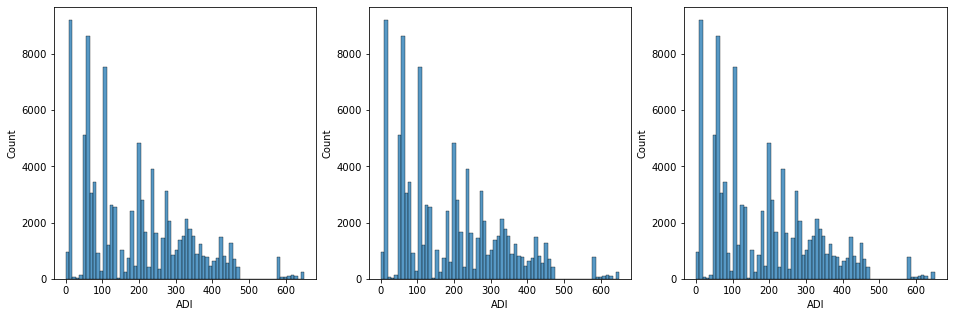

In [12]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(numerical['ADI'], ax = ax[0])
sns.histplot(numerical["ADI"].fillna(np.mean(numerical[numerical['ADI'].notna()]['ADI'])), ax = ax[1])
sns.histplot(numerical['ADI'].fillna(np.median(numerical[numerical['ADI'].notna()]['ADI'])),ax = ax[2])
plt.show()

We can see that the distribution does not change much in any case, so we will apply the Mean on those NaNs:

In [13]:
numerical['ADI'] = numerical["ADI"].fillna(np.median(numerical['ADI']))

In [14]:
numerical['DMA'] = numerical["DMA"].fillna(np.median(numerical['DMA']))
numerical['MSA'] = numerical["MSA"].fillna(np.median(numerical['MSA']))